# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
%matplotlib inline

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/theluggage/Desktop/DataAnalyticsBootcampHomework/uci-virt-data-pt-09-2021-u-c-master/06-Python-APIs/Instructions/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [30]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

581

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}&units={units}
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

# units = "imperial"
# query_url = f"{url}appid={weather_api_key}&units={units}&q="

# # Get weather data
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()
# # Print the response object to the console
print(requests.get(url))

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

<Response [401]>
The weather API responded with: {'cod': '400', 'message': 'Nothing to geocode'}.


In [28]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}&units={units}
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


#Create recepticles
city_names = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
countries = []
dates = []

#Create where we are starting and a counter to add one as we go along the loop and hopefully get over 500 entries required..
index_start = 0
counter = 1

print("Beginning Data Retrieval")
print("-----------------------------")

#Use a loop and enumerate to create a list that will loop and populate the recepticles above. 
#Put a try/except, so we can clean the data in a dataframe after the dataframe is made.
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        
        city_names.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        countries.append(response["sys"]["country"])
        dates.append(response["dt"])
 
 #Use an if statement to add on one city from the random cities as loops.       
        if index_start > 504:
            index_start = 0
            counter = counter + 1
    
        else:
            index_start = index_start + 1
            
        print(f"Processing Record {index_start} of Set {counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : qaanaaq
Processing Record 2 of Set 1 : mehamn
Processing Record 3 of Set 1 : rikitea
City not found. Skipping...
Processing Record 4 of Set 1 : sibu
Processing Record 5 of Set 1 : puerto ayora
City not found. Skipping...
Processing Record 6 of Set 1 : korla
Processing Record 7 of Set 1 : ende
Processing Record 8 of Set 1 : cape town
Processing Record 9 of Set 1 : chokurdakh
Processing Record 10 of Set 1 : bredasdorp
Processing Record 11 of Set 1 : cururupu
Processing Record 12 of Set 1 : sao filipe
Processing Record 13 of Set 1 : yellowknife
Processing Record 14 of Set 1 : bluff
Processing Record 15 of Set 1 : marsh harbour
Processing Record 16 of Set 1 : busselton
City not found. Skipping...
Processing Record 17 of Set 1 : vaini
Processing Record 18 of Set 1 : port blair
City not found. Skipping...
City not found. Skipping...
Processing Record 19 of Set 1 : saint-philippe
Processing Record 20 of Set

Processing Record 182 of Set 1 : georgetown
Processing Record 183 of Set 1 : san rafael
Processing Record 184 of Set 1 : college
Processing Record 185 of Set 1 : iracoubo
Processing Record 186 of Set 1 : bengkulu
Processing Record 187 of Set 1 : salalah
Processing Record 188 of Set 1 : ileza
City not found. Skipping...
Processing Record 189 of Set 1 : east london
Processing Record 190 of Set 1 : dunedin
Processing Record 191 of Set 1 : lucea
Processing Record 192 of Set 1 : severo-kurilsk
Processing Record 193 of Set 1 : lalmohan
Processing Record 194 of Set 1 : lorengau
Processing Record 195 of Set 1 : manado
Processing Record 196 of Set 1 : dingle
Processing Record 197 of Set 1 : arman
Processing Record 198 of Set 1 : torbay
Processing Record 199 of Set 1 : barcelona
Processing Record 200 of Set 1 : alvarado
City not found. Skipping...
Processing Record 201 of Set 1 : portland
Processing Record 202 of Set 1 : richards bay
Processing Record 203 of Set 1 : corowa
Processing Record 204 

Processing Record 368 of Set 1 : poya
Processing Record 369 of Set 1 : fuzhou
Processing Record 370 of Set 1 : birjand
Processing Record 371 of Set 1 : berezovka
Processing Record 372 of Set 1 : yashkul
Processing Record 373 of Set 1 : mindelo
City not found. Skipping...
Processing Record 374 of Set 1 : port hedland
Processing Record 375 of Set 1 : bazarnyye mataki
Processing Record 376 of Set 1 : senanga
City not found. Skipping...
Processing Record 377 of Set 1 : loubomo
Processing Record 378 of Set 1 : petropavlovsk-kamchatskiy
Processing Record 379 of Set 1 : metlika
City not found. Skipping...
Processing Record 380 of Set 1 : mana
Processing Record 381 of Set 1 : kamenka
Processing Record 382 of Set 1 : vao
Processing Record 383 of Set 1 : kavieng
Processing Record 384 of Set 1 : kem
Processing Record 385 of Set 1 : nyazepetrovsk
Processing Record 386 of Set 1 : victoria point
Processing Record 387 of Set 1 : shubarkuduk
Processing Record 388 of Set 1 : yukamenskoye
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [96]:
# Create a data frame.

city_weather_df = pd.DataFrame({
    "City": city_names,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": countries,
    "Date": dates
})

city_weather_df




,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,-1.59,59,0,7.87,GL,1635044591
1,Mehamn,71.0357,27.8492,36.50,63,98,18.39,NO,1635044591
2,Rikitea,-23.1203,-134.9692,74.91,79,100,19.22,PF,1635044586
3,Sibu,2.3000,111.8167,85.17,70,91,2.06,MY,1635044660
4,Puerto Ayora,-0.7393,-90.3518,68.88,89,79,7.85,EC,1635044661
...,...,...,...,...,...,...,...,...,...
543,Kankakee,41.1500,-87.8667,47.91,80,1,6.91,US,1635044854
544,Sidi Ali,36.0998,0.4206,60.39,82,0,8.57,DZ,1635044855
545,Williams Lake,52.1415,-122.1445,34.23,74,90,1.01,CA,1635044855
546,Araguaína,-7.1911,-48.2072,75.22,81,49,3.56,BR,1635044856


In [97]:
#Export dataframe to a CSV

city_weather_df.to_csv('city_weather.csv')

In [98]:
#Get the statistical information from each column onto one dataframe. Drop the city and county column.
city_weather_df_red = city_weather_df.drop(['City', 'Country'], axis=1)
city_weather_stats = city_weather_df_red.describe(include='all')
city_weather_stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,19.079539,19.108736,59.572464,71.897810,54.833942,7.666934,1.635045e+09
std,33.571481,89.170849,20.423395,19.816723,40.260802,5.581863,1.250654e+02
min,-54.800000,-179.166700,-8.930000,10.000000,0.000000,0.000000,1.635044e+09
25%,-8.786500,-60.817475,44.990000,61.000000,8.000000,3.360000,1.635045e+09
50%,22.912100,24.607350,62.675000,75.500000,68.000000,6.230000,1.635045e+09
75%,45.942800,99.344550,77.022500,88.000000,96.250000,10.957500,1.635045e+09
max,78.218600,178.416700,100.450000,100.000000,100.000000,31.900000,1.635045e+09


In [99]:
less_humid = city_weather_df.loc[city_weather_df["Humidity"] < 100]
less_humid


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,-1.59,59,0,7.87,GL,1635044591
1,Mehamn,71.0357,27.8492,36.50,63,98,18.39,NO,1635044591
2,Rikitea,-23.1203,-134.9692,74.91,79,100,19.22,PF,1635044586
3,Sibu,2.3000,111.8167,85.17,70,91,2.06,MY,1635044660
4,Puerto Ayora,-0.7393,-90.3518,68.88,89,79,7.85,EC,1635044661
...,...,...,...,...,...,...,...,...,...
543,Kankakee,41.1500,-87.8667,47.91,80,1,6.91,US,1635044854
544,Sidi Ali,36.0998,0.4206,60.39,82,0,8.57,DZ,1635044855
545,Williams Lake,52.1415,-122.1445,34.23,74,90,1.01,CA,1635044855
546,Araguaína,-7.1911,-48.2072,75.22,81,49,3.56,BR,1635044856


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [100]:
#Ran a loc to isolate the cities that are under 100%.
less_humid = city_weather_df.loc[city_weather_df["Humidity"] < 100]
less_humid

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,-1.59,59,0,7.87,GL,1635044591
1,Mehamn,71.0357,27.8492,36.50,63,98,18.39,NO,1635044591
2,Rikitea,-23.1203,-134.9692,74.91,79,100,19.22,PF,1635044586
3,Sibu,2.3000,111.8167,85.17,70,91,2.06,MY,1635044660
4,Puerto Ayora,-0.7393,-90.3518,68.88,89,79,7.85,EC,1635044661
...,...,...,...,...,...,...,...,...,...
543,Kankakee,41.1500,-87.8667,47.91,80,1,6.91,US,1635044854
544,Sidi Ali,36.0998,0.4206,60.39,82,0,8.57,DZ,1635044855
545,Williams Lake,52.1415,-122.1445,34.23,74,90,1.01,CA,1635044855
546,Araguaína,-7.1911,-48.2072,75.22,81,49,3.56,BR,1635044856


In [101]:
#Get the statistical information from each column onto one dataframe. Drop the city and county column.
less_humid_red = less_humid.drop(['City', 'Country'], axis=1)
less_humid_stats = less_humid_red.describe(include='all')
less_humid_stats

#This includes the count. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,18.928928,18.965536,59.697578,71.743119,54.653211,7.679835,1.635045e+09
std,33.537115,89.185154,20.274704,19.760795,40.290431,5.590323,1.252600e+02
min,-54.800000,-179.166700,-8.930000,10.000000,0.000000,0.000000,1.635044e+09
25%,-8.843200,-61.250000,45.030000,61.000000,8.000000,3.360000,1.635045e+09
50%,22.890900,24.731400,62.710000,75.000000,67.000000,6.290000,1.635045e+09
75%,45.647200,99.184400,77.090000,88.000000,96.000000,11.010000,1.635045e+09
max,78.218600,178.416700,100.450000,99.000000,100.000000,31.900000,1.635045e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [102]:
more_humid = city_weather_df.loc[city_weather_df["Humidity"] > 100]
more_humid

#There are no cities on the city_weather_df that are over 100%. The three that are not included in the less_humid dataframe have a humidity of exactly 100%.
one_hundred_percent_humid = city_weather_df.loc[city_weather_df["Humidity"] == 100]
one_hundred_percent_humid

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
65,Cherskiy,68.7500,161.3000,-5.24,100,88,4.54,RU,1635044546
174,Grindavik,63.8424,-22.4338,45.07,100,75,9.22,IS,1635044672
487,Abengourou,6.7297,-3.4964,70.70,100,100,2.21,CI,1635044675


In [103]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

Q1 = city_weather_df['Humidity'].quantile(0.25)
Q3 = city_weather_df['Humidity'].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
lower_lim, upper_lim

#Ran a loc to isolate the cities that are under 100%.
clean_city_data = city_weather_df.loc[(city_weather_df["Humidity"] < 128.5) | (city_weather_df["Humidity"] > 20.5)]
clean_city_data

#There were no outliers.

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,-1.59,59,0,7.87,GL,1635044591
1,Mehamn,71.0357,27.8492,36.50,63,98,18.39,NO,1635044591
2,Rikitea,-23.1203,-134.9692,74.91,79,100,19.22,PF,1635044586
3,Sibu,2.3000,111.8167,85.17,70,91,2.06,MY,1635044660
4,Puerto Ayora,-0.7393,-90.3518,68.88,89,79,7.85,EC,1635044661
...,...,...,...,...,...,...,...,...,...
543,Kankakee,41.1500,-87.8667,47.91,80,1,6.91,US,1635044854
544,Sidi Ali,36.0998,0.4206,60.39,82,0,8.57,DZ,1635044855
545,Williams Lake,52.1415,-122.1445,34.23,74,90,1.01,CA,1635044855
546,Araguaína,-7.1911,-48.2072,75.22,81,49,3.56,BR,1635044856


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

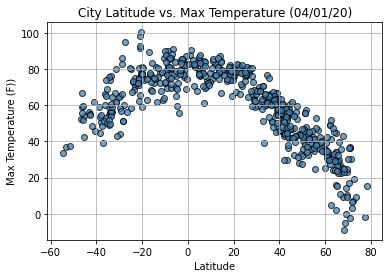

In [77]:
# Generate a scatter plot of latitude vs. max temperature.
plt.scatter(latitude,max_temp, marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F))')
plt.grid()
plt.savefig('latvstemp.png')
plt.show()

#This code is analyzing the relationship between the maximum temperature and its latitude. 
#The curve indicates that--with the exception of 5 outliers where the latitude is -20 to -40--that the max temperature is highest when one is within 20 degrees north or south of the equator.
#There seems to be only a slightly greater drop off in temperature when one goes _proportionally_ further north (this does not count 60 - 80 degrees latitude. The proportional decrease in temperature is greater as one goes farther from the equator, so it makes sense that the temperature drop in the 60-80 range is a lot sharper.)

In [ ]:
## Latitude vs. Humidity Plot

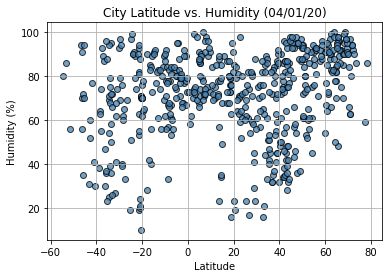

In [90]:
# Generate a scatter plot of latitude vs. humidity
plt.scatter(latitude,humidity, marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('latvshumid.png')
plt.show()

## Latitude vs. Cloudiness Plot

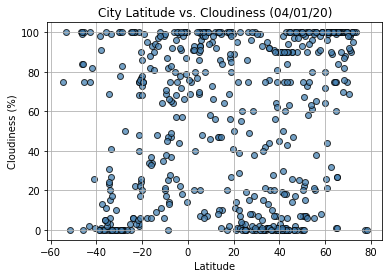

In [91]:
# Generate a scatter plot of latitude vs. cloudiness
plt.scatter(latitude,cloudiness, marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('latvscloudy.png')
plt.show()

## Latitude vs. Wind Speed Plot

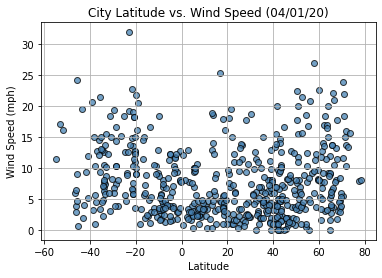

In [92]:
# Generate a scatter plot of latitude vs. wind speed
plt.scatter(latitude,wind_speed, marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('latvswindspeed.png')
plt.show()

## Linear Regression

In [104]:
#Separate the datafames into northern and southern hemispheres.
nh_clean_city_data = clean_city_data.loc[clean_city_data["Lat"] >= 0]
sh_clean_city_data = clean_city_data.loc[clean_city_data["Lat"] < 0]
nh_clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,-1.59,59,0,7.87,GL,1635044591
1,Mehamn,71.0357,27.8492,36.50,63,98,18.39,NO,1635044591
3,Sibu,2.3000,111.8167,85.17,70,91,2.06,MY,1635044660
5,Korla,41.7597,86.1469,51.85,34,50,4.09,CN,1635044629
8,Chokurdakh,70.6333,147.9167,-2.11,97,99,5.48,RU,1635044662
...,...,...,...,...,...,...,...,...,...
541,Haines Junction,60.7522,-137.5108,34.52,95,96,3.36,CA,1635044853
542,Parakou,9.3372,2.6303,71.33,93,94,3.38,BJ,1635044854
543,Kankakee,41.1500,-87.8667,47.91,80,1,6.91,US,1635044854
544,Sidi Ali,36.0998,0.4206,60.39,82,0,8.57,DZ,1635044855


In [105]:
sh_clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Rikitea,-23.1203,-134.9692,74.91,79,100,19.22,PF,1635044586
4,Puerto Ayora,-0.7393,-90.3518,68.88,89,79,7.85,EC,1635044661
6,Ende,-8.8432,121.6623,89.96,57,82,5.77,ID,1635044661
7,Cape Town,-33.9258,18.4232,55.11,75,20,6.91,ZA,1635044120
9,Bredasdorp,-34.5322,20.0403,49.28,69,69,2.19,ZA,1635044585
...,...,...,...,...,...,...,...,...,...
530,Aitape,-3.1374,142.3475,83.26,79,100,9.24,PG,1635044849
533,Reconquista,-29.1500,-59.6500,57.07,94,0,3.91,AR,1635044850
536,Bambanglipuro,-7.9500,110.2833,86.11,63,28,7.40,ID,1635044682
546,Araguaína,-7.1911,-48.2072,75.22,81,49,3.56,BR,1635044856


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


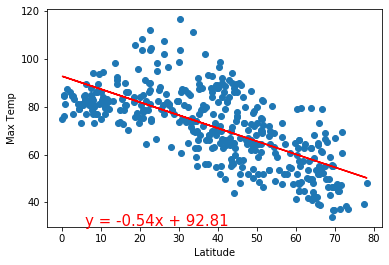

In [ ]:
print(f"The r-value is : {round(st.pearsonr(x, y)[0])}")

# Generate a scatter plot of latitude vs. max temperature.
plt.scatter(nh_clean_city_data['Lat'],nh_clean_city_data['Max Temp'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("Northern Hemisphere - City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F))')
plt.savefig('nhlatvstemp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


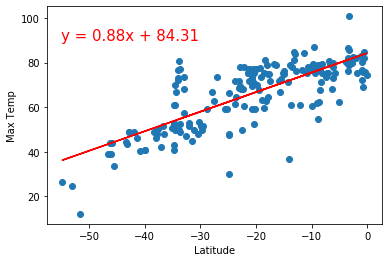

In [ ]:
print(f"The r-value is : {round(st.pearsonr(x, y)[0])}")

# Generate a scatter plot of latitude vs. max temperature.
plt.scatter(sh_clean_city_data['Lat'],sh_clean_city_data['Max Temp'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("Southern Hemisphere - City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F))')
plt.savefig('shlatvstemp.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
print(f"The r-value is : {round(st.pearsonr(x, y)[0])}")

# Generate a scatter plot of latitude vs. humidity.
plt.scatter(nh_clean_city_data['Lat'],nh_clean_city_data['Humidity'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("Northern Hemisphere - City Latitude vs. Humidity (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%))')
plt.savefig('nhlatvshumid.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


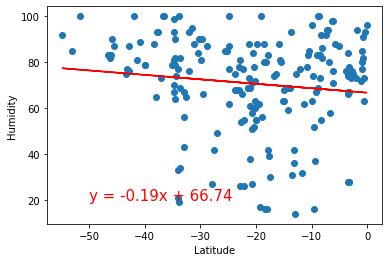

In [ ]:
print(f"The r-value is : {round(st.pearsonr(x, y)[0])}")

# Generate a scatter plot of latitude vs. humidity.
plt.scatter(sh_clean_city_data['Lat'],sh_clean_city_data['Humidity'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("Southern Hemisphere - City Latitude vs. Humidity (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%))')
plt.savefig('shlatvshumid.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


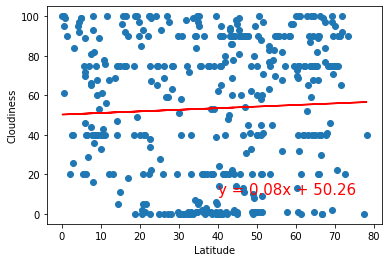

In [ ]:
print(f"The r-value is : {round(st.pearsonr(x, y)[0])}")

# Generate a scatter plot of latitude vs. cloudiness.
plt.scatter(nh_clean_city_data['Lat'],nh_clean_city_data['Cloudiness'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')
plt.savefig('nhlatvscloudy.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


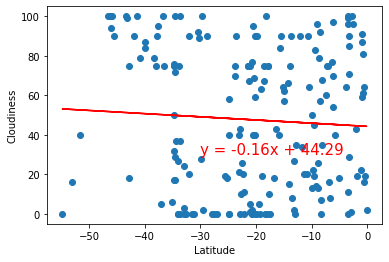

In [ ]:
print(f"The r-value is : {round(st.pearsonr(x, y)[0])}")

# Generate a scatter plot of latitude vs. cloudiness.
plt.scatter(sh_clean_city_data['Lat'],sh_clean_city_data['Cloudiness', marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')
plt.savefig('shlatvscloudy.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


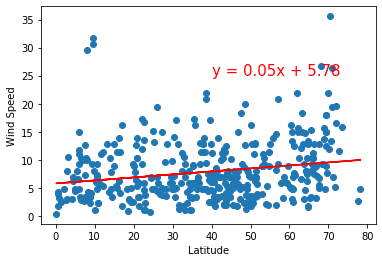

In [ ]:
print(f"The r-value is : {round(st.pearsonr(x, y)[0])}")

# Generate a scatter plot of latitude vs. wind speed.
plt.scatter(nh_clean_city_data['Lat'],nh_clean_city_data['Wind Speed'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
plt.savefig('nhlatvswindspeed.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


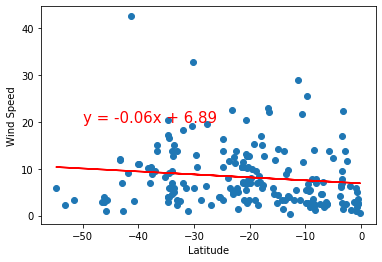

In [ ]:
print(f"The r-value is : {round(st.pearsonr(x, y)[0])}")

# Generate a scatter plot of latitude vs. wind speed.
plt.scatter(sh_clean_city_data['Lat'],sh_clean_city_data['Wind Speed'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("Southern Hemisphere - City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
plt.savefig('nhlatvswindspeed.png')
plt.show()